In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('./output/Rhee SK.csv', index_col=0)
# selecting rows based on condition
df = df[df['prob'] > 0.8]
df.tail()

mention      obj    prob      pmid
2406                      oxidase     gene  0.9680  21186289
2407                     catalase     gene  0.9850  21186289
2408                   F. glaciei  species  0.9688  21186289
2409                F. johnsoniae  species  0.9736  21186289
2411  Flavobacterium chungbukense  species  0.8280  21186289

In [3]:
counts = df['mention'].value_counts()
counts[counts >= 10]

ammonia                     87
NaCl                        32
methane                     32
carbon                      30
nitrogen                    23
N2O                         22
fatty acids                 22
16S rRNA gene sequences     20
nitrite                     20
16S rRNA gene sequence      20
16S rRNA gene               18
iron                        17
sulfur                      15
phosphatidylglycerol        14
Ammonia                     13
nitrate                     13
phosphatidylethanolamine    11
AOA                         11
PHB                         10
swine                       10
Name: mention, dtype: int64

# Data cleaning

<AxesSubplot:>

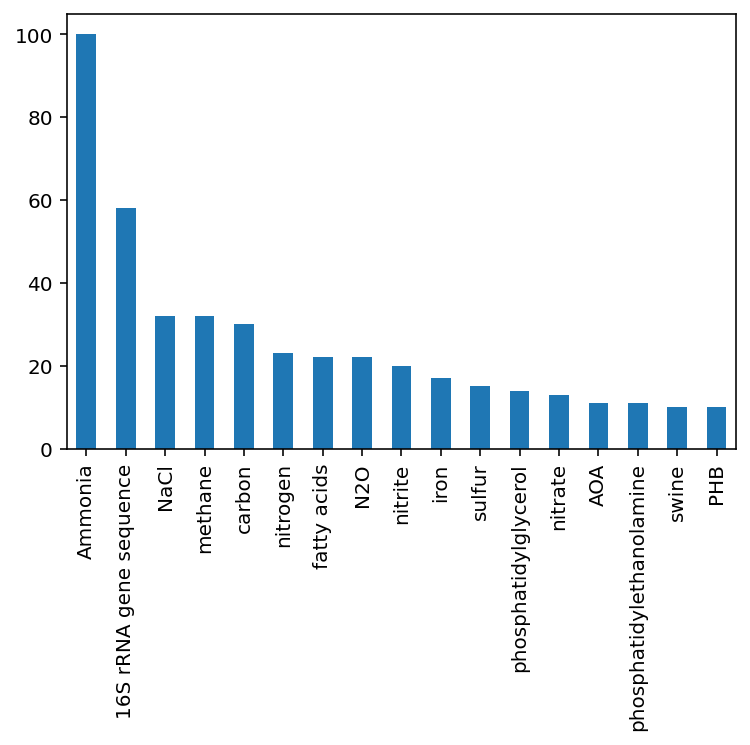

In [4]:
df['mention'] = df['mention'].replace(['16S rRNA gene sequences'],'16S rRNA gene sequence')
df['mention'] = df['mention'].replace(['16S rRNA gene'],'16S rRNA gene sequence')
df['mention'] = df['mention'].replace(['ammonia'],'Ammonia')
counts = df['mention'].value_counts()
counts[counts >= 10].plot.bar()


# Visualization


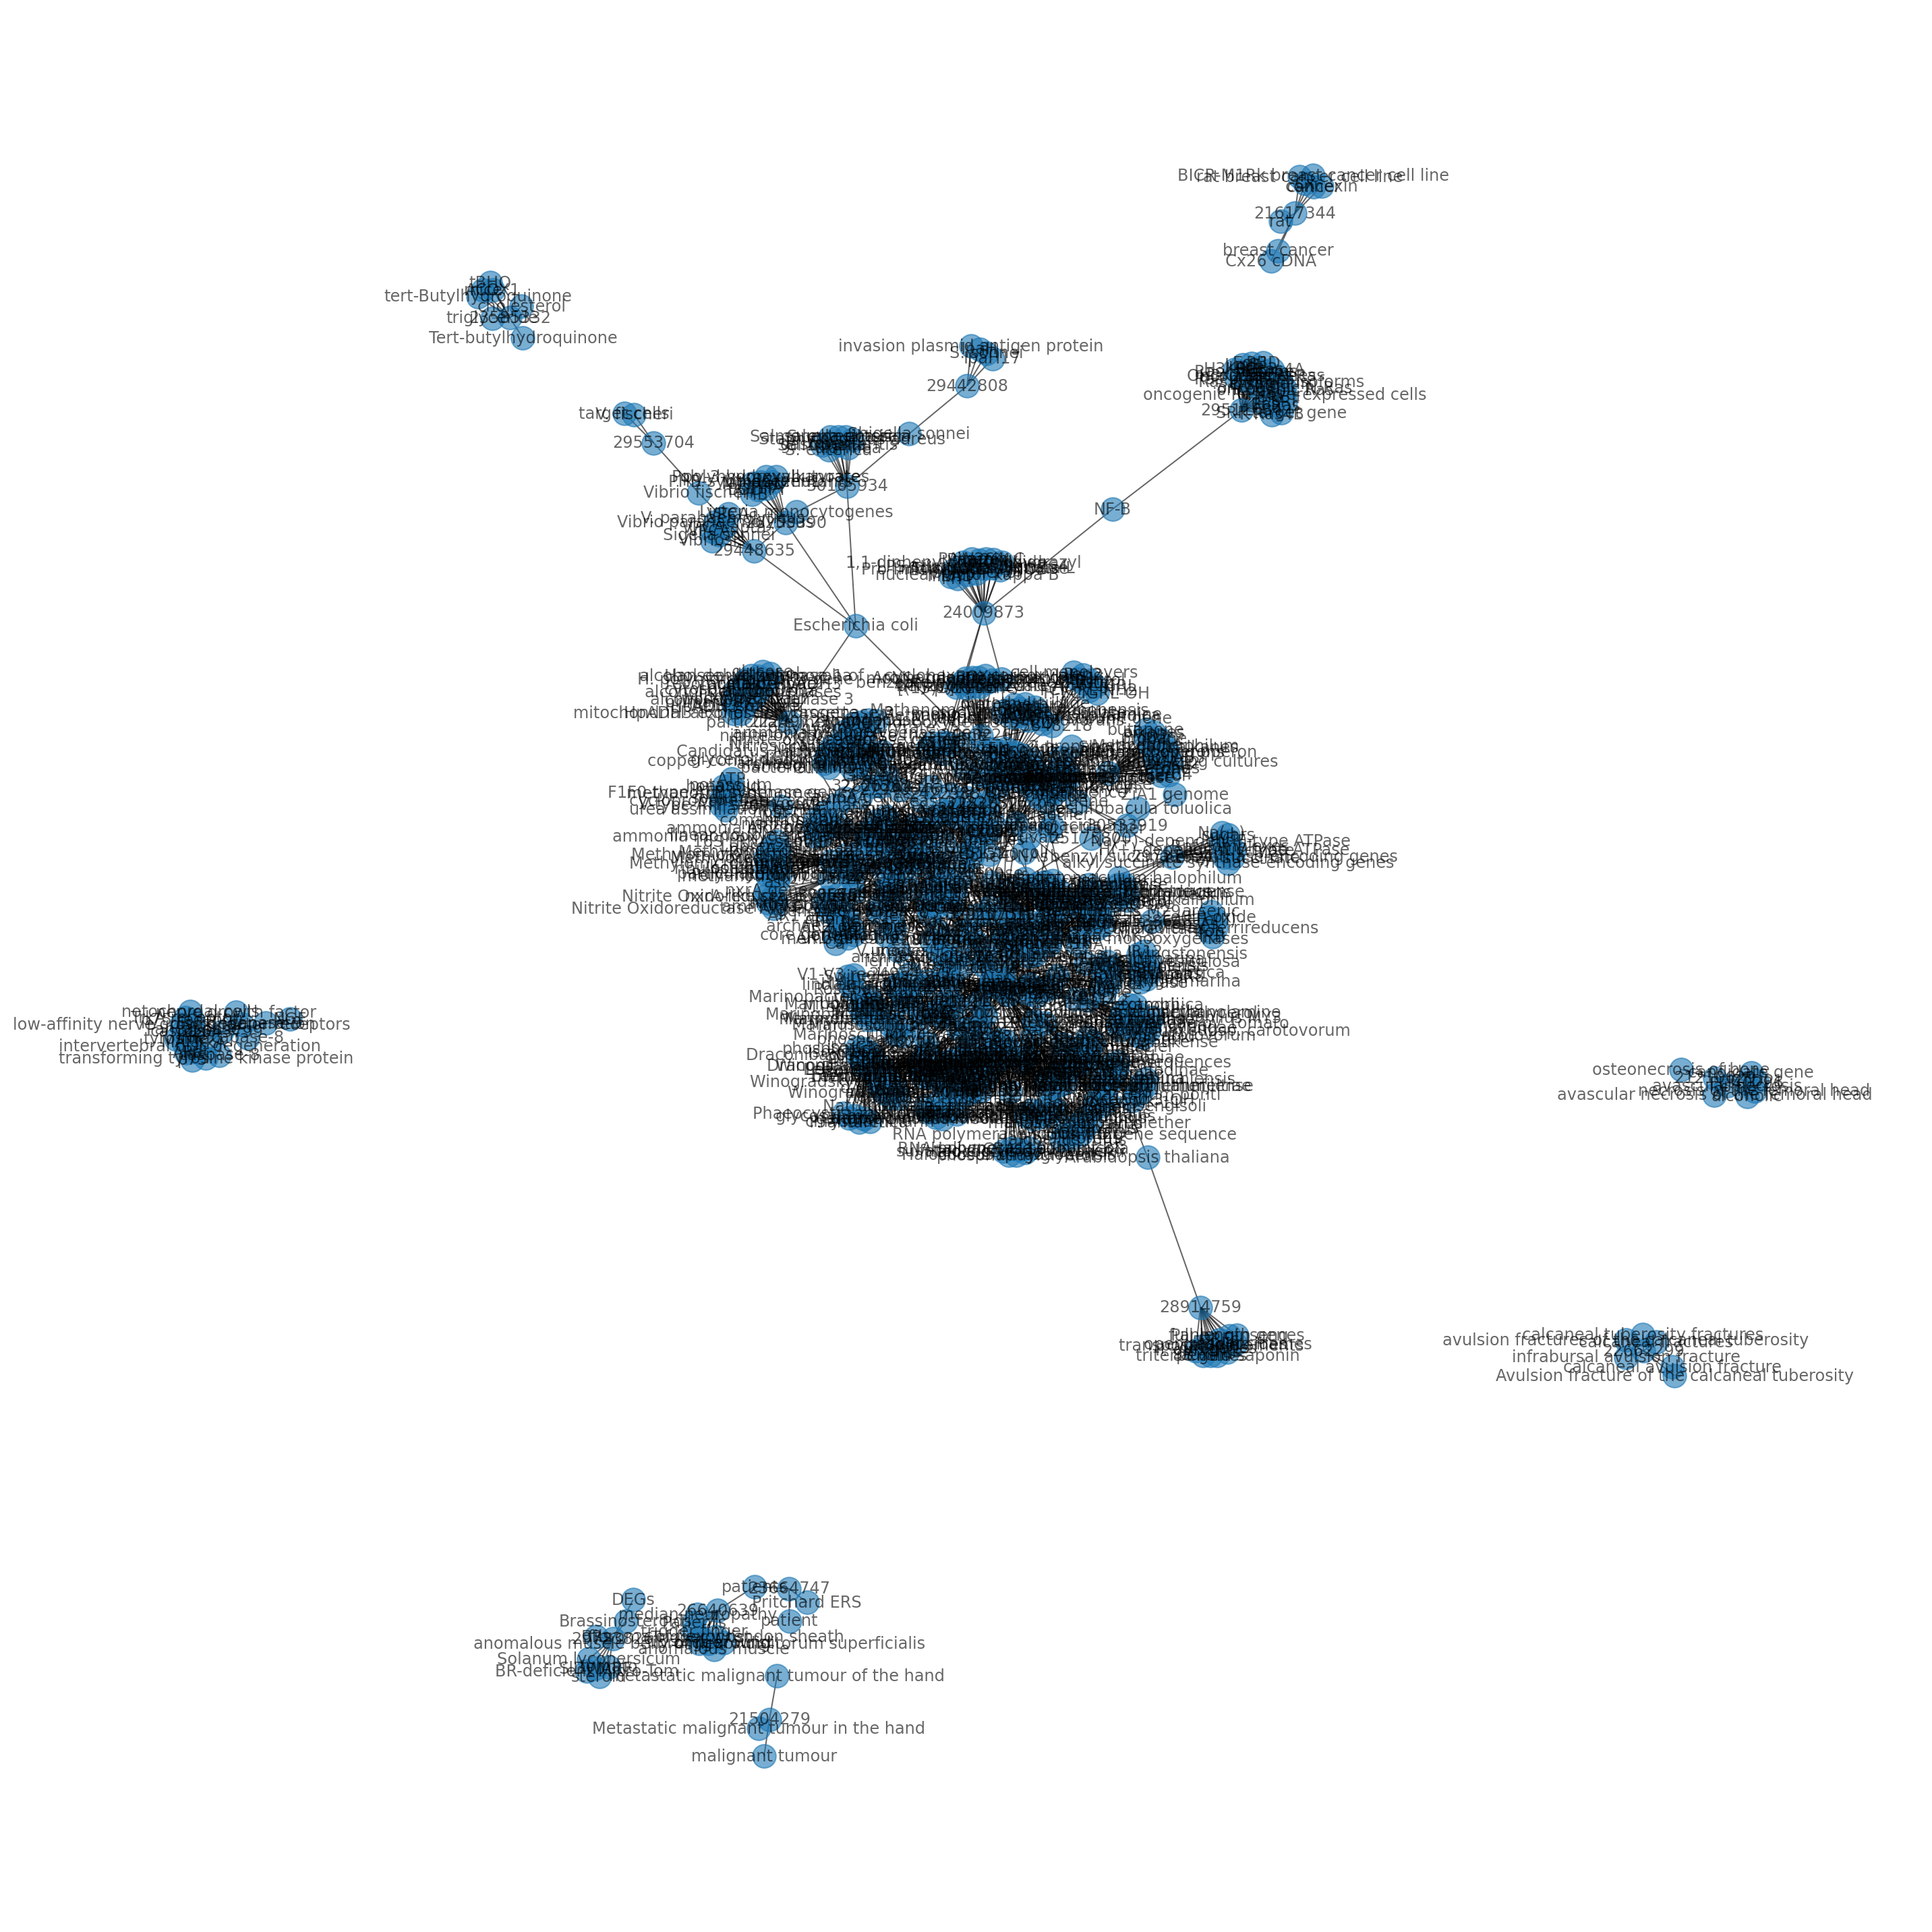

In [5]:
G = nx.from_pandas_edgelist(df, source='pmid', target='mention', edge_attr=True)
# Specify figure size
fig, ax = plt.subplots(figsize=(20, 20))

# Compute node position using the default spring_layout  
node_position = nx.spring_layout(G)
nx.draw(G, node_position, with_labels=True, alpha=0.6)

fig.tight_layout()
plt.show()

In [6]:
remove = [node for node,degree in dict(G.degree()).items() if degree < 2]
# G.nodes()
G.remove_nodes_from(remove)
# G.nodes()

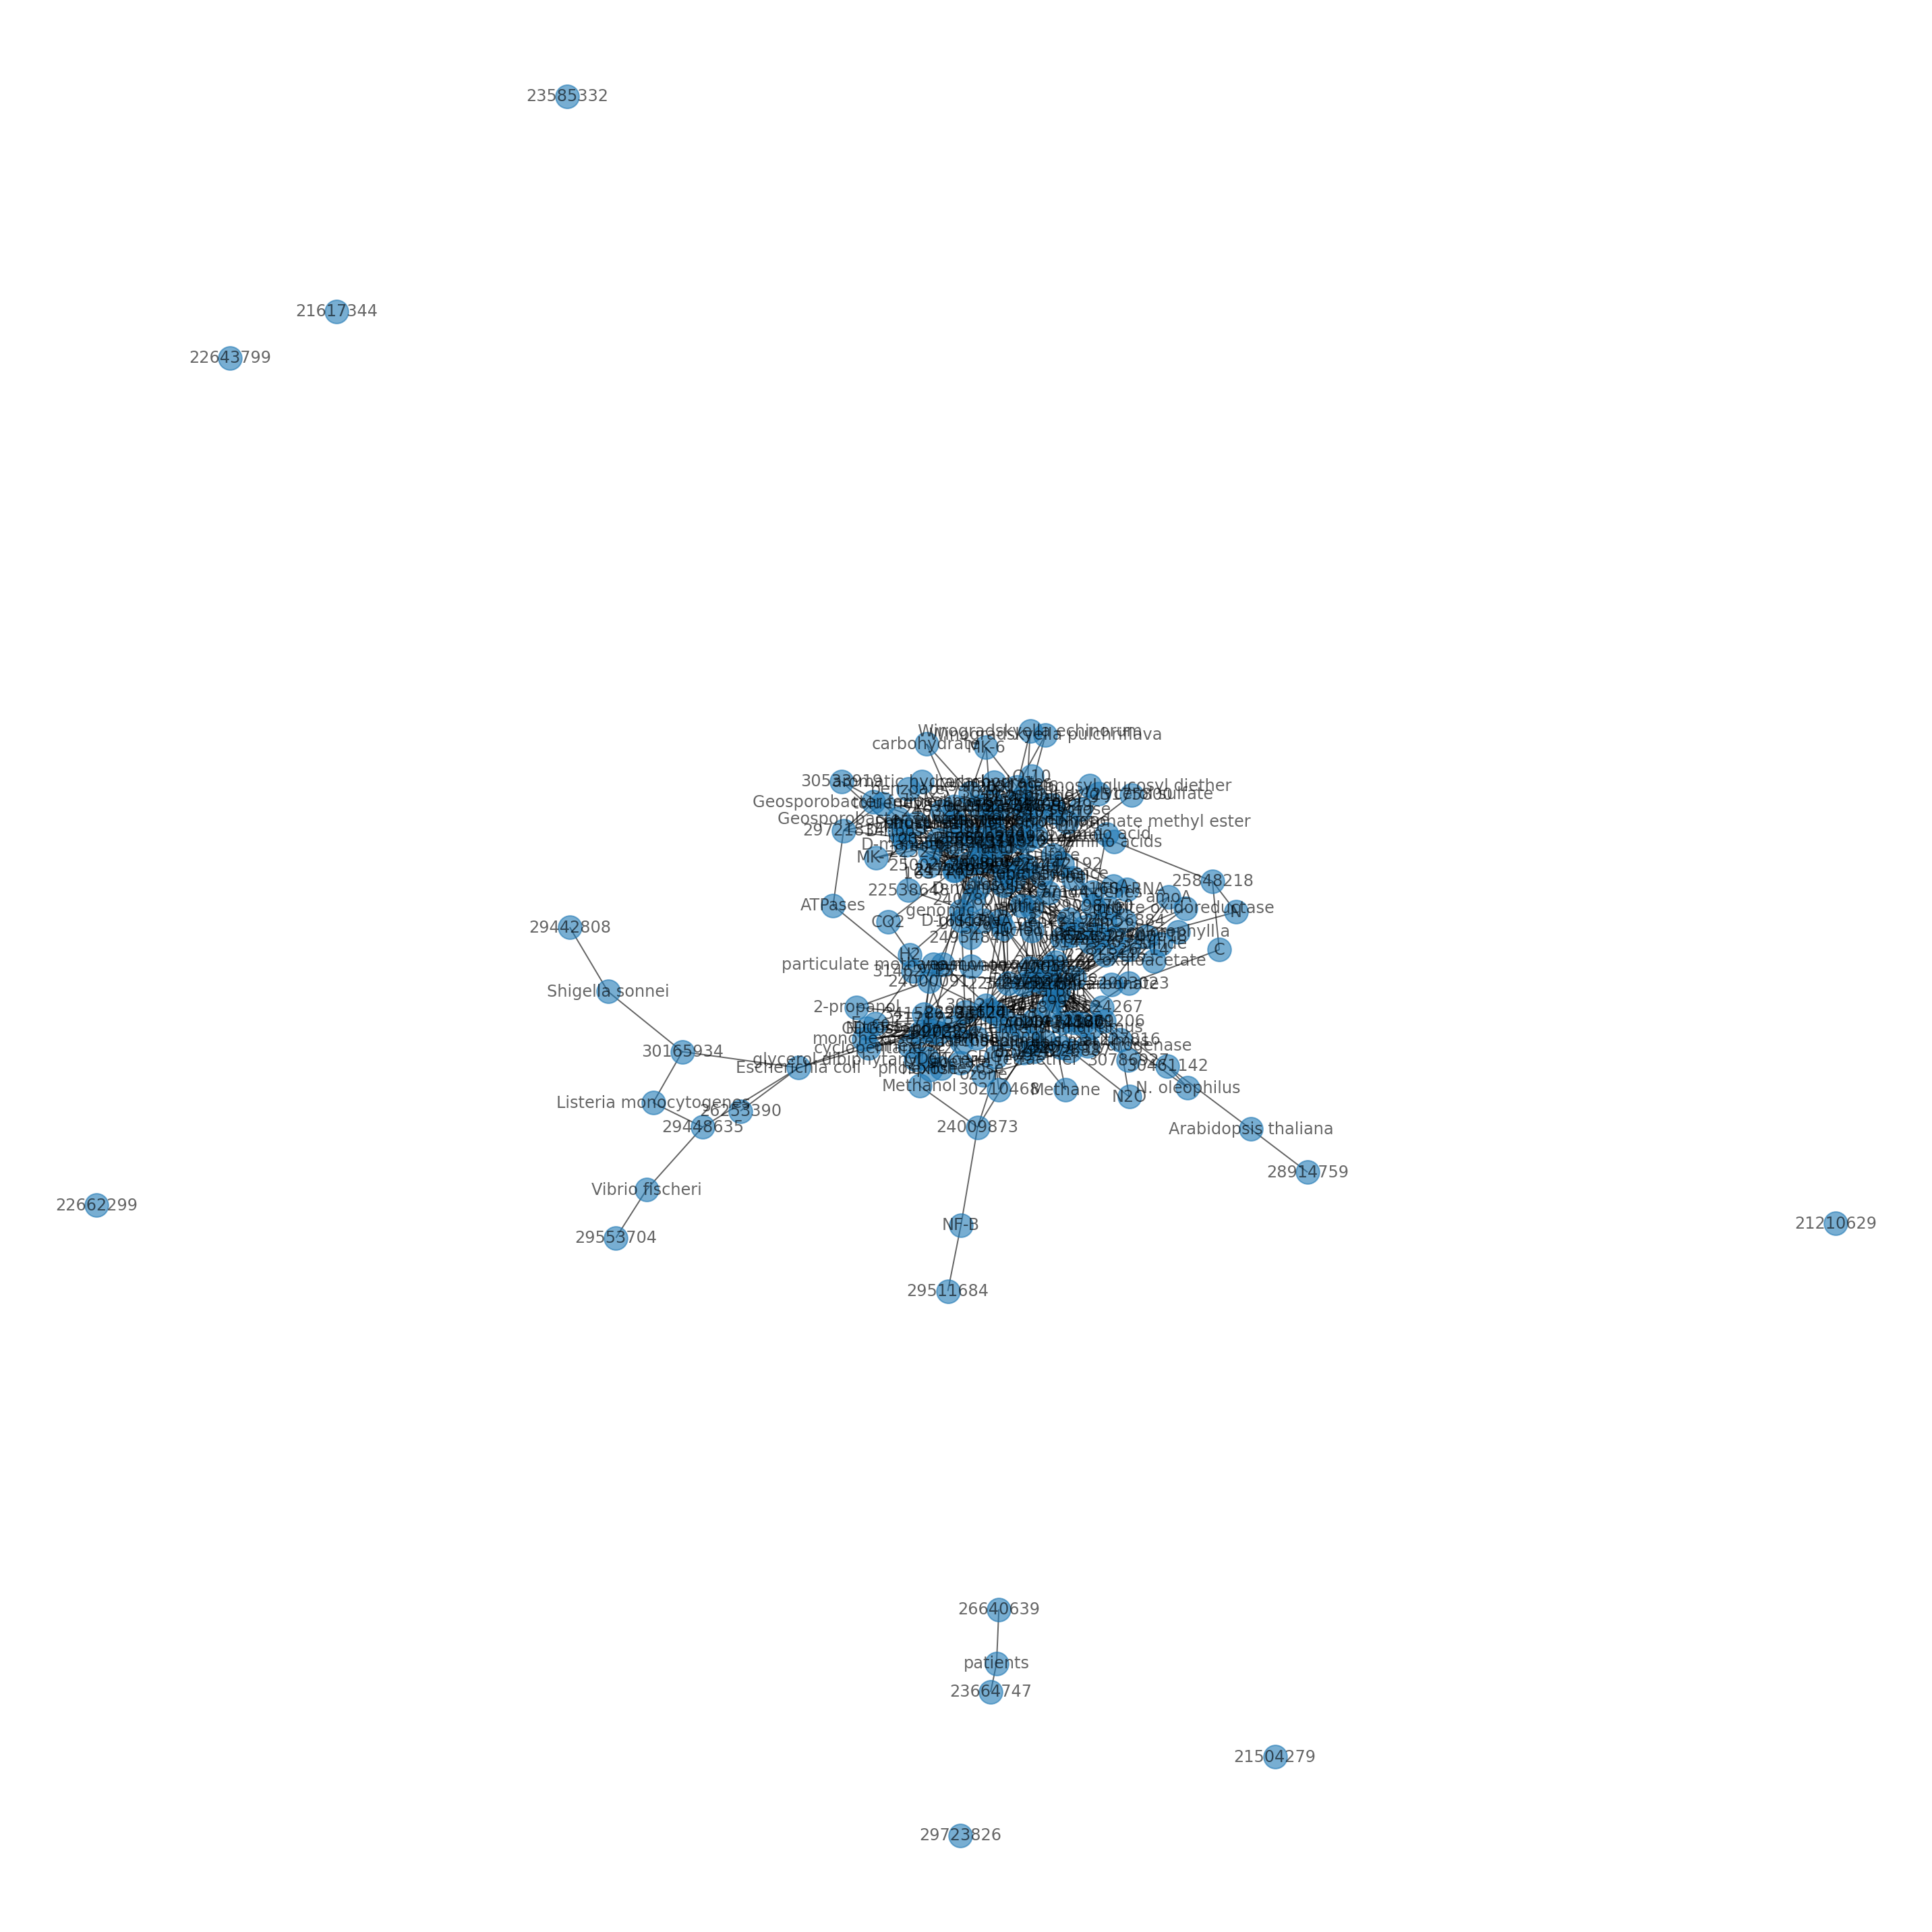

In [7]:
# Specify figure size
fig, ax = plt.subplots(figsize=(20, 20))

# Compute node position using the default spring_layout  
node_position = nx.spring_layout(G)
nx.draw(G, node_position, with_labels=True, alpha=0.6)

fig.tight_layout()
plt.show()

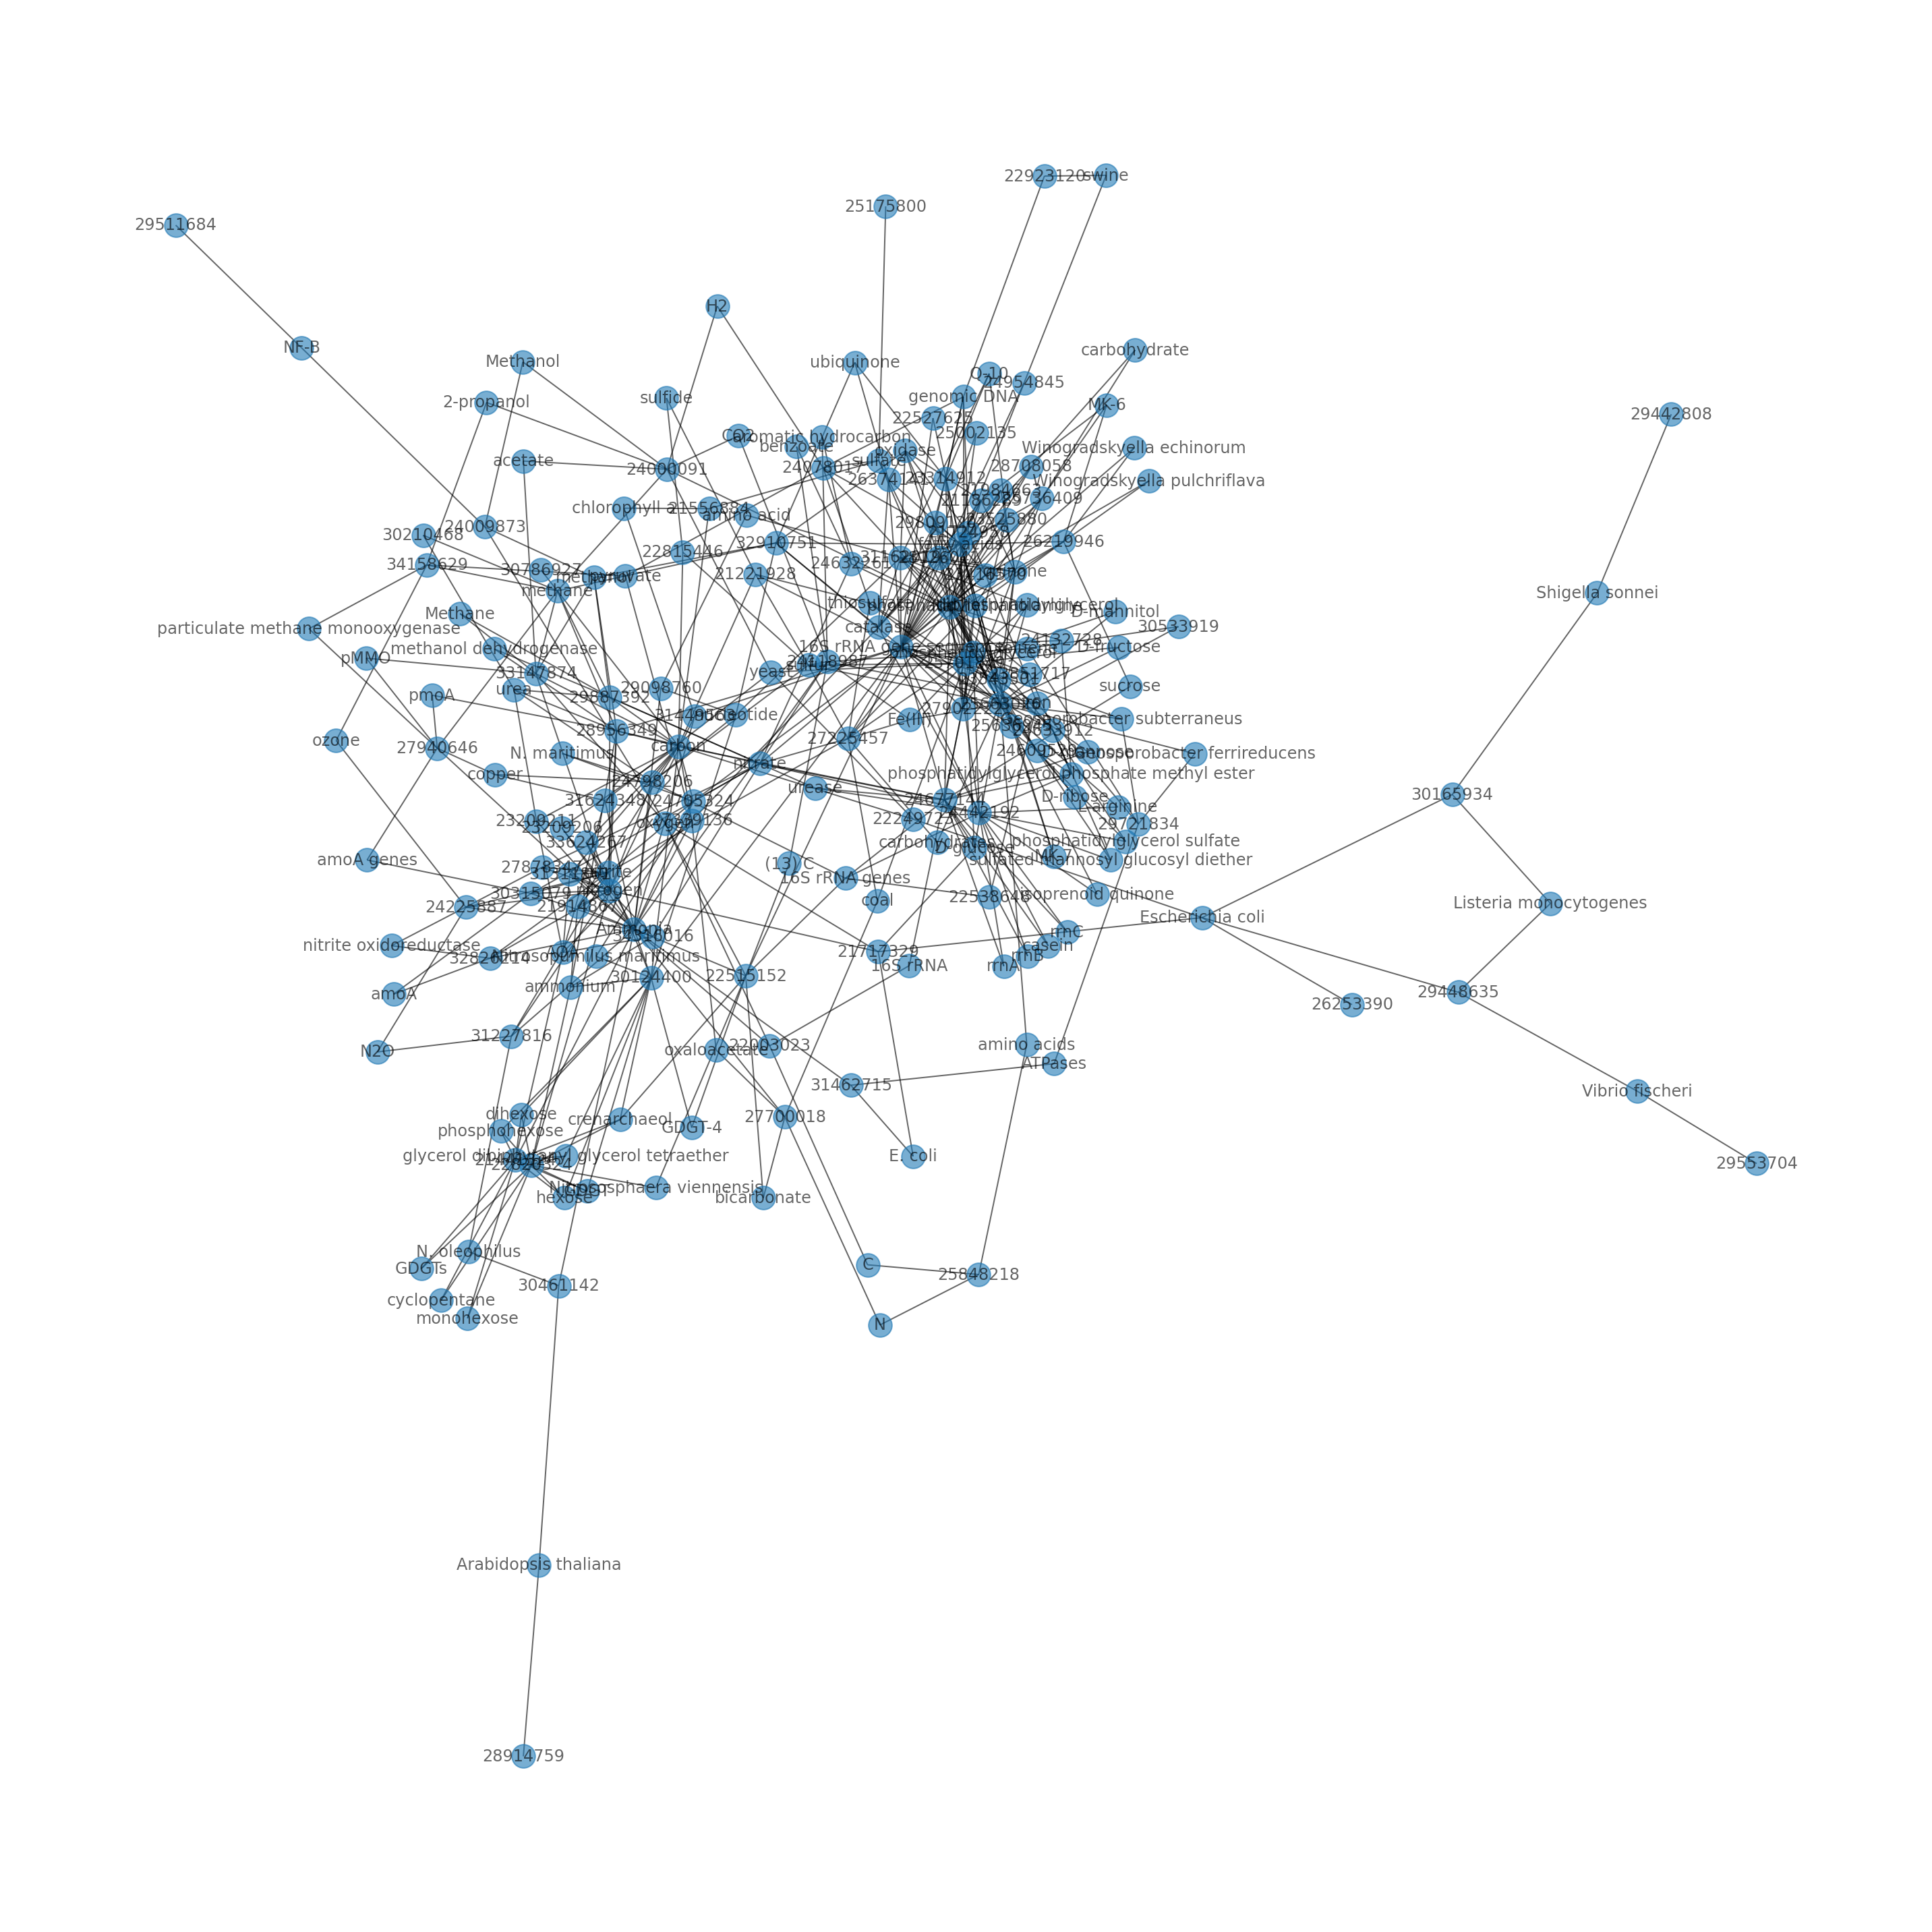

In [8]:
df.drop(df[df['pmid'] == 29723826].index, inplace=True)
df.drop(df[df['pmid'] == 23585332].index, inplace=True)
df.drop(df[df['pmid'] == 21504279].index, inplace=True)
df.drop(df[df['pmid'] == 22662299].index, inplace=True)
df.drop(df[df['pmid'] == 23664747].index, inplace=True)
df.drop(df[df['pmid'] == 26640639].index, inplace=True)
df.drop(df[df['pmid'] == 22643799].index, inplace=True)
df.drop(df[df['pmid'] == 21210629].index, inplace=True)
df.drop(df[df['pmid'] == 21617344].index, inplace=True)


G = nx.from_pandas_edgelist(df, source='pmid', target='mention', edge_attr=True)
remove = [node for node,degree in dict(G.degree()).items() if degree < 2]
G.remove_nodes_from(remove)

# Specify figure size
fig, ax = plt.subplots(figsize=(20, 20))

# Compute node position using the default spring_layout  
node_position = nx.spring_layout(G)
nx.draw(G, node_position, with_labels=True, alpha=0.6)

fig.tight_layout()
plt.show()

In [9]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# # remove low-degree nodes
# low_degree = [n for n, d in G.degree() if d < 10]
# G.remove_nodes_from(low_degree)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}


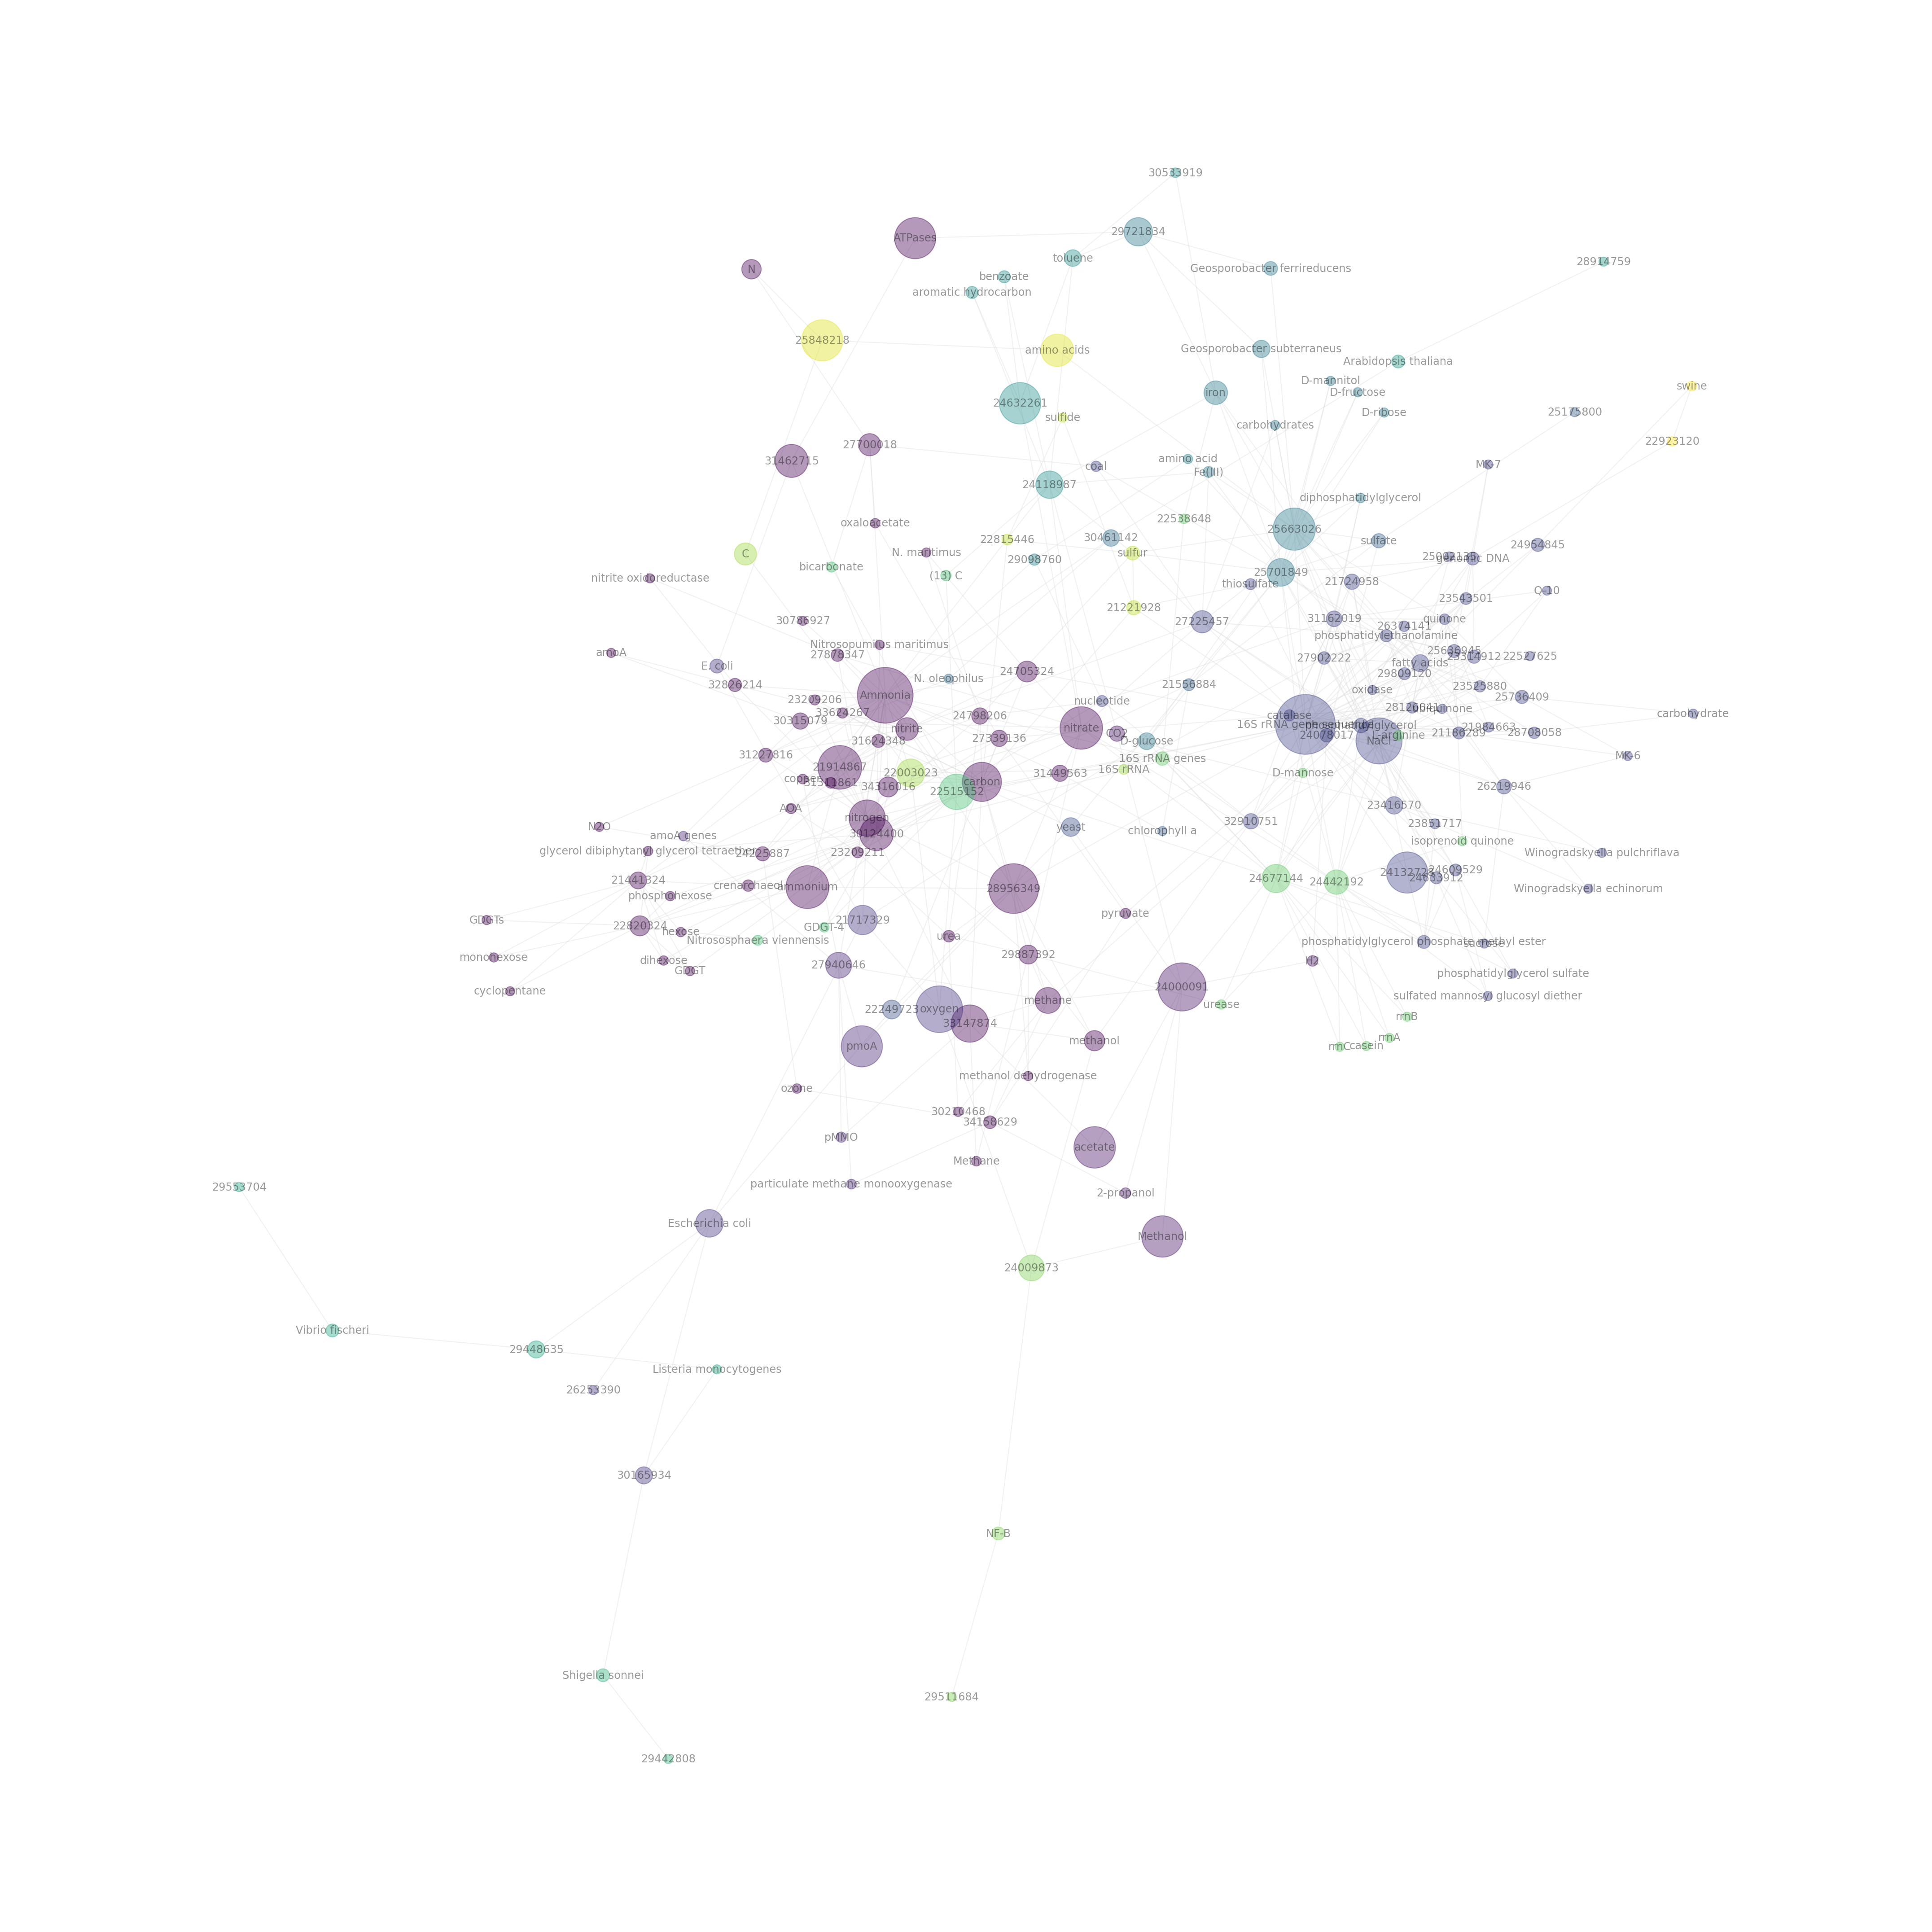

In [10]:
#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 20))
pos = nx.spring_layout(H, k=0.15, seed=42)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=True,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4
)